In [13]:
# Load the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import json
import umap

nltk.download('punkt')
nltk.download('stopwords')

# ingnore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LDSCS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LDSCS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the json file
def load_json(file_path):
    return pd.read_json(file_path)

# Load the data
data = load_json('../data/Recipe-Ingredients-Dataset/train.json')

# Load JSON data
df = pd.json_normalize(data.to_dict(orient='records'))
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
# Combine ingredients into a single string for each recipe
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))
df

# Preprocess ingredients (tokenize and remove stop words)
stop_words = set(stopwords.words('english'))

def preprocess_ingredients(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['ingredients_clean'] = df['ingredients_str'].apply(preprocess_ingredients)
df

,id,cuisine,ingredients,ingredients_str,ingredients_clean
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce black olives grape tomatoes ga...,romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour ground pepper salt tomatoes ground...,plain flour ground pepper salt tomatoes ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs pepper salt mayonaise cooking oil green c...,eggs pepper salt mayonaise cooking oil green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water vegetable oil wheat salt,water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper shallots cornflour cayenne pepper...,black pepper shallots cornflour cayenne pepper...
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",light brown sugar granulated sugar butter warm...,light brown sugar granulated sugar butter warm...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",KRAFT Zesty Italian Dressing purple onion broc...,kraft zesty italian dressing purple onion broc...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",eggs citrus fruit raisins sourdough starter fl...,eggs citrus fruit raisins sourdough starter fl...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",boneless chicken skinless thigh minced garlic ...,boneless chicken skinless thigh minced garlic ...


In [11]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ingredients_clean'])
y = df['cuisine']

In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification

In [14]:
# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.83      0.54      0.65        84
     british       0.83      0.27      0.41       157
cajun_creole       0.81      0.63      0.71       328
     chinese       0.70      0.87      0.78       510
    filipino       0.77      0.37      0.50       136
      french       0.58      0.53      0.55       550
       greek       0.82      0.51      0.63       249
      indian       0.82      0.90      0.86       602
       irish       0.75      0.32      0.45       151
     italian       0.70      0.93      0.80      1567
    jamaican       1.00      0.52      0.68        91
    japanese       0.85      0.64      0.73       284
      korean       0.91      0.64      0.76       166
     mexican       0.85      0.94      0.89      1336
    moroccan       0.90      0.60      0.72       166
     russian       0.71      0.25      0.37        89
 southern_us       0.64      0.75      0.69       848
     spanish       0.80    

# Cultsering

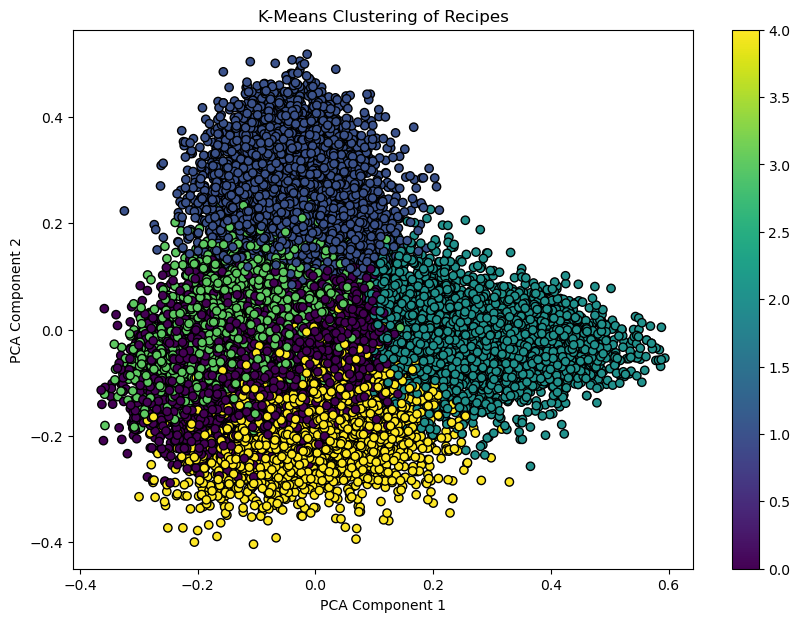

In [15]:
# Apply K-Means clustering
num_clusters = 5  # You can change this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X.toarray())

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Recipes')
plt.colorbar()
plt.show()

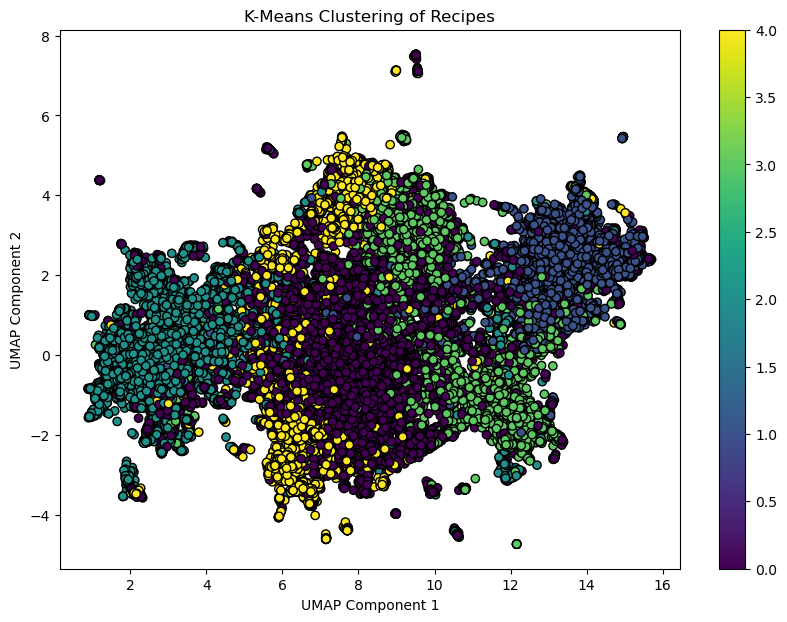

In [16]:
# Apply K-Means clustering
num_clusters = 5  # You can change this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X.toarray())

# Add cluster labels to the DataFrame
df['cluster'] = clusters

# Visualize the clusters using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('K-Means Clustering of Recipes')
plt.colorbar()
plt.show()

# Unique Ingredients list

In [17]:
# Generate a list of all ingredients and remove any duplicates
unique_ingredients = set()

for ingredients in df['ingredients']:
    for ingredient in ingredients:
        unique_ingredients.add(ingredient.lower())  # Convert to lowercase to ensure uniqueness

# Convert set to list and sort
unique_ingredients_list = sorted(list(unique_ingredients))

# Display the unique ingredients
print(unique_ingredients_list)
# see list in more readable format
print(json.dumps(unique_ingredients_list, indent=4))
# calculate the number of unique ingredients
print(len(unique_ingredients_list))

['(    oz.) tomato sauce', '(   oz.) tomato paste', '(10 oz.) frozen chopped spinach', '(10 oz.) frozen chopped spinach, thawed and squeezed dry', '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes', '(15 oz.) refried beans', '1% low-fat buttermilk', '1% low-fat chocolate milk', '1% low-fat cottage cheese', '1% low-fat milk', '2 1/2 to 3 lb. chicken, cut into serving pieces', '2% low fat cheddar chees', '2% low-fat cottage cheese', '2% lowfat greek yogurt', '2% milk shredded mozzarella cheese', '2% reduced-fat milk', '25% less sodium chicken broth', '33% less sodium cooked deli ham', '33% less sodium cooked ham', '33% less sodium ham', '33% less sodium smoked fully cooked ham', '40% less sodium taco seasoning', '40% less sodium taco seasoning mix', '7 up', '8 ounc ziti pasta, cook and drain', '95% lean ground beef', 'a taste of thai rice noodles', 'abalone', 'abbamele', 'absinthe', 'abura age', 'acai juice', 'accent', 'accent seasoning', 'accompaniment', 'achiote', 'achiot

In [18]:
# save the list of unique ingredients to a file
with open('../data/unique_ingredients.txt', 'w') as f:
    for item in unique_ingredients_list:
        f.write("%s\n" % item)